# Chemicals in Cosmetics:

#### This project will take a look at the top rated skin care products for a variety of skin types focusing on the following questions:
- What are the top rated Skin Care products in each category(Moisturizer, Cleanser, Face Mask) 
- What are the bottom rated products in each of these categories. 
- What are the top and bottom rated products in each category sorted by skin type. 
- We can then take this analysis a step futher by looking at the list of hazardous and potentially hazardous cosmetic ingredients as defined by the California Department of Public Health to determine in each of our categories if any of these types of ingredients are more or less common. 
#### Hypothesis: 
1. The top rated and higher priced skin care items are less likey to contain hazardous or potentially hazardous chemicals.

#### To preform this anaylysis the following datasets will be used: 
1. https://www.kaggle.com/kingabzpro/cosmetics-datasets (cosmetics.csv, 1.1 MB, 1473 rows, 11 columns) 
2. https://data.world/chhs/ca-chemicals-in-cosmetics (Chemicals_in_Cosmetics.csv, 20.93 MB, 76,908 rows, 22 columns)

In [ ]:
#Import libaries needed to clean data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
# import the cosmetics data set retrived from https://www.kaggle.com/kingabzpro/cosmetics-datasets
df_C1 = pd.read_csv('cosmetics.csv', header=None)
df_C1.columns = ["Label","Brand","Name","Price","Rank","Ingredients","Combination","Dry","Normal","Oily","Sensitive"]

###  This data set includes 6 different product catergories: 
- moisturizers
- cleansers
- face masks
- eye creams
- treaments
- and Sun protection
### There are also 5 skin type categories: 
- combination
- dry
- normal
- oily
- sensitive

#### For this project we will focus on Mosturizers, Cleansers, and Face Masks

In [ ]:
# Preview the Data 
df_C1.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
2,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1


In [ ]:
# find the length of the data frame to see the scale of data that we are working with
len(df_C1)

1473

# Data Cleaning:

In [ ]:
df_C1 = df_C1.drop(labels=0, axis=0)

# Some notes on this data set
#### - Limited edition products will be excluded as they are no longer sold may not have had enough market saturation at the time of data retreival to receive accurate ranking
#### - Products Ranked 0 have been cross checked with the Sephora.com website to include new much higher rankings and will also be excluded from this analysis as they may have been too new in the market and likley didn't have enough reviews to be statistically significant

### Note: In this analysis due to the nature of the data it is difficult to determine or account for: 
    1. The fact that an unequal number of reviews exists between the ranking for each product. 
    2. Some of the products have been more recently introduced to the market and thus do not have enough reviews to have an accurate ranking.

In [ ]:
df_C1 = df_C1[~df_C1["Name"].str.contains("Limited Edition", na=False)]
df_C1 = df_C1[~df_C1["Name"].str.contains("Limited-Edition", na=False)]
df_C1 = df_C1[~df_C1["Name"].str.contains("Mini", na=False)]

In [ ]:
df_C1.dtypes

Label          object
Brand          object
Name           object
Price          object
Rank           object
Ingredients    object
Combination    object
Dry            object
Normal         object
Oily           object
Sensitive      object
dtype: object

In [ ]:
df_C1['Price']= df_C1['Price'].astype(str).astype(int)

# Creating smaller data sets for each category: 

## Moisturizers: 

In [ ]:
# Create a data set of just Mositurizers from the original data set using the label column
df_M= df_C1[df_C1["Label"].str.contains("Moisturizer", na=False)]

In [ ]:
# sort by brand to see if there is any double products
df_M= df_M.sort_values("Brand")
df_M

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
291,Moisturizer,ALGENIST,Firming & Lifting Neck Cream,98,3.9,"Water, Isononyl Isononanoate, Dimethicone, But...",0,0,0,0,0
288,Moisturizer,ALGENIST,POWER Recharging Night Pressed Serum,95,4.4,"Cocos Nucifera (Coconut) Water, Water (Aqua, E...",1,1,1,1,1
103,Moisturizer,ALGENIST,GENIUS Ultimate Anti-Aging Cream,112,4.3,"Water, Caprylic/Capric Triglyceride, Hydrogent...",1,1,1,1,1
188,Moisturizer,ALGENIST,Overnight Restorative Cream,94,4.4,"Water, Isopropyl Isostearate, Butyrospermum Pa...",0,0,0,0,0
217,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41,Moisturizer,TATCHA,Luminous Dewy Skin Mist,48,4.0,"Water, Glycerin, Squalane (Olive Origin), Cycl...",1,1,1,0,1
60,Moisturizer,TATCHA,The Silk Cream,120,4.3,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,1,0,1
132,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
52,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1


In [ ]:
# Sort the Mosturizers by Rank to determine the top and bottom rated products 
df_M= df_M.sort_values("Rank")
df_M

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
99,Moisturizer,LA MER,The Moisturizing Cool Gel Cream,175,3.3,Visit the La Mer boutique,1,1,1,1,1
262,Moisturizer,TATA HARPER,Repairative Moisturizer,110,3.4,*Ingredients from organic farming. **Clinical ...,0,1,0,0,0
145,Moisturizer,ORIGINS,A Perfect World™ SPF 40 Age-Defense Moisturize...,45,3.5,"Avobenzone 3.0%, Homosalate 8.0%, Octinoxate 7...",1,1,1,1,1
104,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+ Airbrush Perfecting ...,35,3.6,"Mica, Lauroyl Lysine, Zinc Stearate, Ethylhexy...",0,0,0,0,0
163,Moisturizer,LA MER,The Moisturizing Soft Lotion,270,3.6,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1
245,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,38,5.0,"Water, Caprylic/Capric Triglyceride, Squalane,...",1,1,1,0,0
178,Moisturizer,NURSE JAMIE,Tech Neck Prevention Kit,69,5.0,-Silicone Wrap: Creates a hydrating climate fo...,0,0,0,0,0


### The Top Ranked Mosturizers are: 
#### 5.0 Ranking: 
- Nurse Jamie (Tech neck Prevention Kit) $69
- Dior (Capture Totale Multi prefection Creme Refill) $140 
- Laneige (Water Blank Dual Layer Face Oil) $38
#### 4.9 Ranking: 
- Estee Lauder (Advanced Night Repair Intensive Recovery Ampoules) $115 
- REN Clean SkinCare (Evercalm Overnight recovery Balm) $48 

### The Bottom Ranked Mosturizers are: 
#### 3.3-3.6 Ranking: 
- LA MER (The Moisturizing Cool Gel Cream) $175
- TATA HARPER (Repairative Moisturizer) $110
- ORIGINS (A Perfect World™ SPF 40 Age-Defense Moisturizer with White Tea) $45
- IT COSMETICS (Your Skin But Better™ CC+ Airbrush Perfecting Powder™ with SPF 50+) $35
- LA MER (The Moisturizing Soft Lotion) $270

#### *There appears to be some variation between price and rating with the top rated products ranging from 140 USD to 38 USD and the bottom rated products ranging from 35USD to  270USD

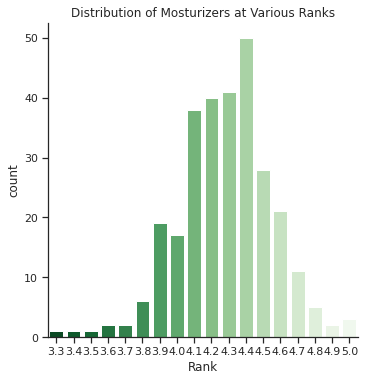

In [ ]:
# Plot the number of products in each rank
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="Rank", kind="count", palette="Greens_r", data=df_M).set(title="Distribution of Mosturizers at Various Ranks")

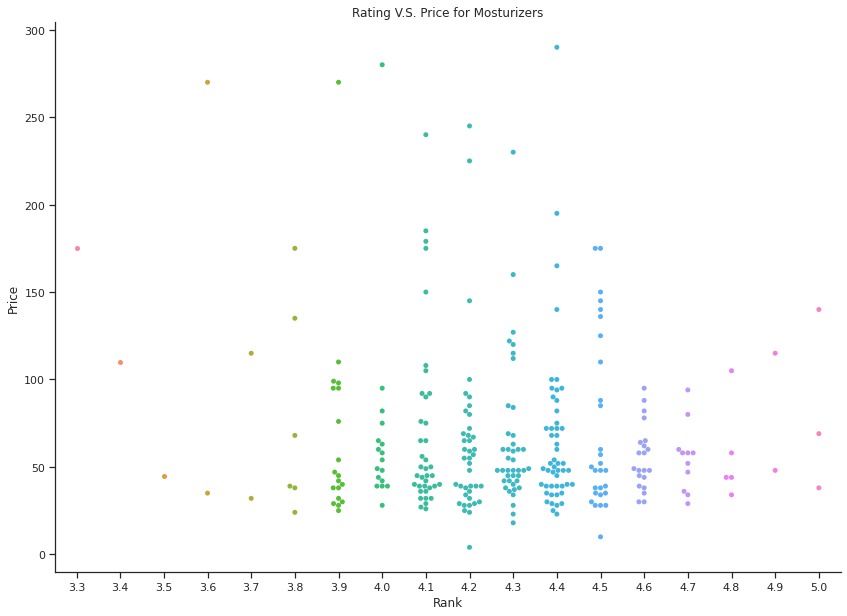

In [ ]:
# Plot the Price v.s the Rank to see if there is some correlation between the two 
sns.catplot(x="Rank", y="Price", kind="swarm", data=df_M,height=8.27, aspect=11.7/8.27).set(title="Rating V.S. Price for Mosturizers")

#### - There doesn't appear to be much of a correlation between price for mosturizers similar to what we saw with the top and bottom rated mosturizers there is a range of price points for each rating. 
#### - The mid rated products do apper to cluster below 100 dollars for the most part. This may be due to how many reviews there are per product. 

# Sort by Skin Type:

In [ ]:
# make a small data frame for the combination skin type and sort by rank
df_MCombo= df_M.sort_values("Combination")
df_MCombo = df_MCombo[~df_MCombo["Combination"].str.contains("0", na=False)]
df_MCombo= df_MCombo.sort_values("Rank")
df_MCombo.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
298,Moisturizer,GO-TO,Face Hero,34,4.8,"Almond Oil, Jojoba Oil, Macadamia Oil, Brazil ...",1,1,1,1,1
132,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
245,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,38,5.0,"Water, Caprylic/Capric Triglyceride, Squalane,...",1,1,1,0,0


In [ ]:
# make a small data frame for the dry skin type and sort by rank
df_Mdry= df_M.sort_values("Dry")
df_Mdry = df_Mdry[~df_Mdry["Dry"].str.contains("0", na=False)]
df_Mdry= df_Mdry.sort_values("Rank")
df_Mdry.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
298,Moisturizer,GO-TO,Face Hero,34,4.8,"Almond Oil, Jojoba Oil, Macadamia Oil, Brazil ...",1,1,1,1,1
132,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
245,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,38,5.0,"Water, Caprylic/Capric Triglyceride, Squalane,...",1,1,1,0,0


In [ ]:
# make a small data frame for the Normal skin type and sort by rank
df_MNorm= df_M.sort_values("Normal")
df_MNorm = df_MNorm[~df_MNorm["Normal"].str.contains("0", na=False)]
df_MNorm= df_MNorm.sort_values("Rank")
df_MNorm.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
52,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
132,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1
245,Moisturizer,LANEIGE,Water Bank Dual Layer Face Oil,38,5.0,"Water, Caprylic/Capric Triglyceride, Squalane,...",1,1,1,0,0


In [ ]:
# make a small data frame for the Oily skin type and sort by rank
df_Moil= df_M.sort_values("Oily")
df_Moil = df_Moil[~df_Moil["Oily"].str.contains("0", na=False)]
df_Moil= df_Moil.sort_values("Rank")
df_Moil.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
114,Moisturizer,BELIF,Aqua Bomb Sleeping Mask,34,4.7,"Water, Dipropylene Glycol, Polyglycerin-3, 1,2...",1,1,1,1,1
298,Moisturizer,GO-TO,Face Hero,34,4.8,"Almond Oil, Jojoba Oil, Macadamia Oil, Brazil ...",1,1,1,1,1
52,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1


In [ ]:
# make a small data frame for the sensative skin type and sort by rank
df_Msen= df_M.sort_values("Sensitive")
df_Msen = df_Msen[~df_Msen["Sensitive"].str.contains("0", na=False)]
df_Msen= df_Msen.sort_values("Rank")
df_Msen.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
298,Moisturizer,GO-TO,Face Hero,34,4.8,"Almond Oil, Jojoba Oil, Macadamia Oil, Brazil ...",1,1,1,1,1
52,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
132,Moisturizer,YOUTH TO THE PEOPLE,Superberry Hydrate + Glow Oil,44,4.8,"Helianthus Annuus (Sunflower) Seed Oil*, Dicap...",1,1,1,0,1
150,Moisturizer,REN CLEAN SKINCARE,Evercalm™ Overnight Recovery Balm,48,4.9,"Coco-Caprylate/Caprate, Glycerin, Water, Almon...",1,1,1,1,1
232,Moisturizer,ESTÉE LAUDER,Advanced Night Repair Intensive Recovery Ampoules,115,4.9,Advanced Night Rpr Int Rcv Ampoule Division: E...,1,1,1,1,1


## Upon Careful examination many of the same products are present in all of the different skin type categories indicating that the most popular products are marketed to many different skin types and that all skin types could potentially see similar ingredient profiles in thier products. 

## Cleansers: 

In [ ]:
# create the cleansers data frame from the origninal data set
df_c= df_C1[df_C1["Label"].str.contains("Cleanser", na=False)]

In [ ]:
# Sort the Cleansers by Rank to determine the top and bottom rated products 
df_c= df_c.sort_values("Rank")
df_c

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
535,Cleanser,PHILOSOPHY,Purity Made Simple® Facial Cleansing Gel & Eye...,23,0.0,"Water, Sodium Trideceth Sulfate, Disodium Laur...",0,0,0,0,0
453,Cleanser,MURAD,Clarifying Toner,24,0.0,"Water, Witch Hazel Water, Butylene Glycol, Alc...",0,0,0,0,0
366,Cleanser,ESTÉE LAUDER,Nutritious Radiant Vitality Energy Lotion,58,0.0,Nutritious Vitality8 Egy Lot Int M Division: E...,0,0,0,0,0
435,Cleanser,BOSCIA,The Future is Female Peppermint Blotting Linens,7,3.3,-Natural Abaca Tree Fiber: Absorbs oil and per...,1,1,1,1,1
569,Cleanser,KIEHL'S SINCE 1851,Blue Herbal Acne Cleanser Treatment,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
573,Cleanser,SEPHORA COLLECTION,Cleansing Wipes - Pomegranate - Energizing,7,5.0,No Info,0,0,0,0,0
574,Cleanser,CLARISONIC,Refreshing Gel Cleanser,19,5.0,"Water, Glycerin, Coco-Betaine, Sodium Cocoyl G...",1,1,1,1,1
432,Cleanser,LANCÔME,Cleansing & Clarifying Duo,45,5.0,"Bi-Facil: Water, Cyclopentasiloxane, Isohexade...",0,0,0,0,0
397,Cleanser,KIEHL'S SINCE 1851,Epidermal Re-Texturizing Micro-Dermabrasion,41,5.0,"Water, Alumina, Paraffinum Liquidum/Mineral Oi...",1,1,1,1,0


#### The top rated cleansers are: 
5.0 rating 
- ERNO LASZLO (Pore Refining Detox Double Cleanse) $55
- KIEHL'S SINCE 1851 (Epidermal Re-Texturizing Micro-Dermabrasion) $41
- LANCÔME (Cleansing and Clarifying Duo) $45
- CLARISONIC (Refreshing Gel Cleanser)$19 
- SEPHORA COLLECTION (Cleansing Wipes Pomegranate-Energizing) $7
- SHISEIDO (Extra Rich Cleaning Milk)$36 

##### * There also seems to be a slight range in prices here from 7 USD to 55 USD for the top rated cleansers but not as big of a shift when compared to the mosturizers 

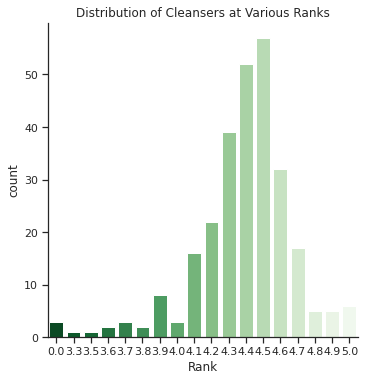

In [ ]:
# Plot the number of products in each rank
sns.catplot(x="Rank", kind="count", palette="Greens_r", data=df_c).set(title="Distribution of Cleansers at Various Ranks")

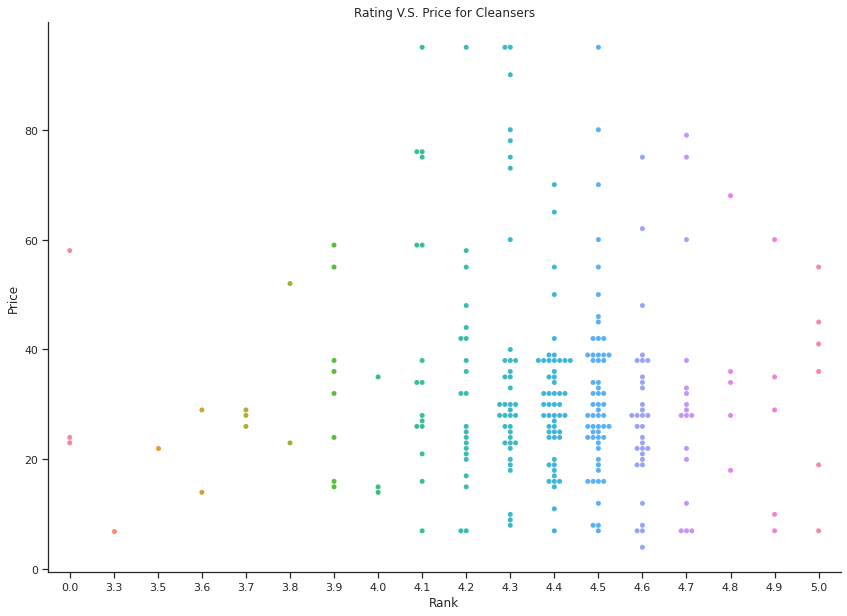

In [ ]:
# Plot the Price v.s the Rank to see if there is some correlation between the two 
sns.catplot(x="Rank", y="Price", kind="swarm", data=df_c, height=8.27, aspect=11.7/8.27).set(title="Rating V.S. Price for Cleansers")

### The price of cleansers seems to generally trend lower than that of Mosturizers but there still does not apper to be much correlation between price and rank

## Face Masks: 

In [ ]:
# make a Face masks data frame from the larger data frame 
df_FM= df_C1[df_C1["Label"].str.contains("Face Mask", na=False)]

In [ ]:
df_FM= df_FM.sort_values("Rank")
df_FM.tail()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
955,Face Mask,FOREO,Make My Day Hydrating & Anti-Pollution UFO™ Ac...,9,5.0,-Hyaluronic Acid -Red Algae,1,1,1,1,1
991,Face Mask,OMOROVICZA,Midnight Radiance Mask,125,5.0,"Water, Glycerin, Propanediol, Alcohol Denat., ...",1,0,1,1,0
989,Face Mask,GLAMGLOW,BUBBLESHEET™ Oxygenating Deep Cleanse Mask - B...,9,5.0,"Water, Glycerin, Methyl Perfluorobutyl Ether, ...",1,1,1,1,0
1000,Face Mask,AMOREPACIFIC,TIME RESPONSE Vintage Wash-off Masque,170,5.0,"Camellia Sinensis Leaf Water, Propanediol, Gly...",1,1,1,1,0
954,Face Mask,SEPHORA COLLECTION,Face Mask - Grape - Anti-pollution,6,5.0,"Water, Butylene Glycol, Glycerin, Betaine, Alo...",1,1,1,1,1


#### The Top Rated Face Masks are: 
5.0 rating
- SEPHORA COLLECTION (Face Mask - Grape - Anti-pollution) $6 
- AMOREPACIFIC (TIME RESPONSE Vintage Wash-off Masque) $170
- GLAMGLOW (BUBBLESHEET™ Oxygenating Deep Cleanse Mask - Breast Cancer Awareness ...) $9 
- OMOROVICZA (Midnight Radiance Mask) $125 
- FOREO (Make My Day Hydrating & Anti-Pollution UFO™ Activated Mask) $9 
- SEPHORA COLLECTION (Experiential Masks Set) $18
- SEPHORA COLLECTION (Sleeping Mask - Coconut Water) $4
- SEPHORA COLLECTION (Sleeping Mask - Aloe Vera) $4
- FOREO (H2Overdose Mask) $19
- DR ROEBUCK’S (Uluru Purifying Mask) $28
- SEPHORA COLLECTION (Face Mask Magic) $25 

##### * The prices in this category also seem to have a very large variation ranging from 4 USD to $170 USD 
##### * It is also notable that many products from the same brands that only have differnt scents and names are included in the top rated in this category for example the Sephora Collection face masks as well as the Foreo face masks. 

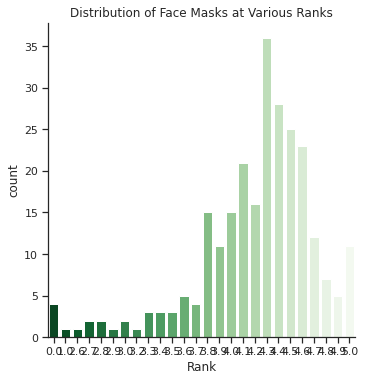

In [ ]:
sns.catplot(x="Rank", kind="count", palette="Greens_r", data=df_FM).set(title="Distribution of Face Masks at Various Ranks")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


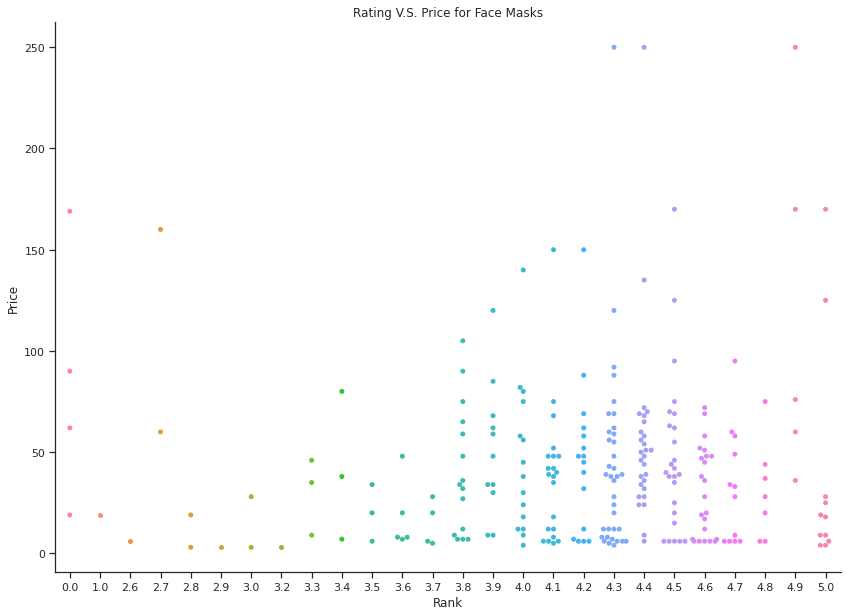

In [ ]:
sns.catplot(x="Rank", y="Price", kind="swarm", data=df_FM, height=8.27, aspect=11.7/8.27).set(title="Rating V.S. Price for Face Masks")

### There appears to be a slight positive trend between price and ratings of Face Masks but for the most part this product category generally looks similar to the other two. 

# California Safe Cosmetics Program Chemicals in Cosmetics Data Set: 
### - The CSCP Collects information regarding hazardous and potentially hazardous ingredients in cosmetic products sold in California 
### - The California Safe Cosmetics Act requires companines to provide the CSCP with a list of all cosmetic products that contain any ingredients known or suspected to cause cancer, birth defects, or other developmental or reproductive harm. 

### - The data table consists of: 
- Label names of products 
- Company/manufacturer names
- Product brand names
- Product categories, 
- Chemical Abstracts Service registry numbers
- Names of reported chemical ingredients 
- Number of reported chemicals
- Dates of reporting 
- Product discontinuation or reformulation 



In [ ]:
# read the CSV data into a panads dataframe
df_Chem = pd.read_csv('Chemicals_in_Cosmetics.csv', header=None)
df_Chem.columns = ["CDPHId", "ProductName", "CSFId", "CSF", "CompanyId", "CompanyName", "BrandName", "PrimaryCategoryId","PrimaryCategory", "SubCategoryId", "SubCategory", "CasId","CasNumber", "ChemicalId", "ChemicalName","InitialDateReported", "MostRecentDateReported", "DiscontinuedDate", "ChemicalCreatedAt", "ChemicalUpdatedAt", "ChemicalDateRemoved", "ChemicalCount"]
df_Chem.head()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0,2,4,7,9,11,13,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
1,4256,"Rainbow Color Acrylic, Purple",NaN,NaN,59,"Young Nails, Inc.",Young Nails,59,Nail Products,60,...,13463-67-7,7626,Titanium dioxide,10/13/2009 12:00:00 AM,10/13/2009 12:00:00 AM,NaN,10/13/2009 12:00:00 AM,10/13/2009 12:00:00 AM,01/01/2009 12:00:00 AM +0000,0
2,1759,Nail Polish,2581,Purple,118,Added Extras LLC,Topps,59,Nail Products,65,...,140-88-5,2021,Ethyl acrylate,09/29/2009 12:00:00 AM,12/30/2010 12:00:00 AM,01/01/2009 12:00:00 AM,09/29/2009 12:00:00 AM,09/29/2009 12:00:00 AM,01/01/2009 12:00:00 AM +0000,0
3,4254,"Rainbow Color Acrylic, Blue",NaN,NaN,59,"Young Nails, Inc.",Young Nails,59,Nail Products,60,...,13463-67-7,7625,Titanium dioxide,10/13/2009 12:00:00 AM,10/13/2009 12:00:00 AM,NaN,10/13/2009 12:00:00 AM,10/13/2009 12:00:00 AM,01/01/2009 12:00:00 AM +0000,0
4,1759,Nail Polish,2579,Pink,118,Added Extras LLC,Topps,59,Nail Products,65,...,140-88-5,2021,Ethyl acrylate,09/29/2009 12:00:00 AM,12/30/2010 12:00:00 AM,01/01/2009 12:00:00 AM,09/29/2009 12:00:00 AM,09/29/2009 12:00:00 AM,01/01/2009 12:00:00 AM +0000,0


### Data Cleaning: 

In [ ]:
# Clean the data set by removing columns that we are not planing to use for our analysis
del df_Chem["CDPHId"]
del df_Chem["CSFId"]
del df_Chem["CSF"]
del df_Chem["CompanyId"]
del df_Chem["CasId"]
del df_Chem["CasNumber"]
del df_Chem["InitialDateReported"]
del df_Chem["MostRecentDateReported"]
del df_Chem["DiscontinuedDate"]
del df_Chem["ChemicalCreatedAt"]
del df_Chem["ChemicalUpdatedAt"]
del df_Chem["ChemicalDateRemoved"]

In [ ]:
# Sort by the skin care products catergory
df_Chem = df_Chem[df_Chem["PrimaryCategory"].str.contains("Skin Care Products", na=False)]
df_Chem.head()

,ProductName,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,ChemicalId,ChemicalName,ChemicalCount
10,Body Lotion SPF-25,"Sunrider Manufacturing, L.P.",Oi-Lin,90,Skin Care Products,102,Skin Moisturizers (making a cosmetic claim),2324,"Retinol/retinyl esters, when in daily dosages ...",0
11,Body Lotion SPF-25,"Sunrider Manufacturing, L.P.",Oi-Lin,90,Skin Care Products,102,Skin Moisturizers (making a cosmetic claim),370,Coffee,0
13,Body Lotion SPF-25,"Sunrider Manufacturing, L.P.",Oi-Lin,90,Skin Care Products,102,Skin Moisturizers (making a cosmetic claim),443,"Retinol/retinyl esters, when in daily dosages ...",0
15,Body Lotion SPF-25,"Sunrider Manufacturing, L.P.",Oi-Lin,90,Skin Care Products,102,Skin Moisturizers (making a cosmetic claim),378,"Silica, crystalline (airborne particles of res...",0
16,Warm Body Scrub,"Sunrider Manufacturing, L.P.",Kandesn Spa,90,Skin Care Products,93,Skin Cleansers,1241,"Silica, crystalline (airborne particles of res...",0


In [ ]:
# Remove cosmetic products so that we can focus soley on the skin care products sub category
df_Chem = df_Chem[~df_Chem["SubCategory"].str.contains("cosmetic", na=False)]
df_Chem = df_Chem[~df_Chem["SubCategory"].str.contains("Other", na=False)]

In [ ]:
# Create a smaller data frame just looking at facial mosturizers using the facial cream sub category 
df_MChem= df_Chem[df_Chem["SubCategory"].str.contains("Facial Cream", na=False)]
df_MChem.head()

,ProductName,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,ChemicalId,ChemicalName,ChemicalCount
133,VITAMIN E COOL BB CREAM,"Buth-na-bodhaige, Inc",The Body Shop,90,Skin Care Products,161,Facial Cream,30209,Triethanolamine,1
194,Firming & Lifting Neck Treatment,"Guthy-Renker, LLC",Natural Advantage,90,Skin Care Products,161,Facial Cream,33957,Retinol,1
569,VITAMIN E TINTED MOISTURE LOTION,"Buth-na-bodhaige, Inc",The Body Shop,90,Skin Care Products,161,Facial Cream,30213,Triethanolamine,1
981,Kinerase Extreme Lift Eye,Valeant Pharmaceuticals North America,Kinerase,90,Skin Care Products,161,Facial Cream,23681,Titanium dioxide,1
1397,Lumene Time Freeze Instant Eye Lift Serum,Lumene Oy,Lumene,90,Skin Care Products,161,Facial Cream,0,Trade Secret,1


# The Most Common Potentially Harmful ingredients in Facial Mosturizers
##### * Including Titanium Dioxide

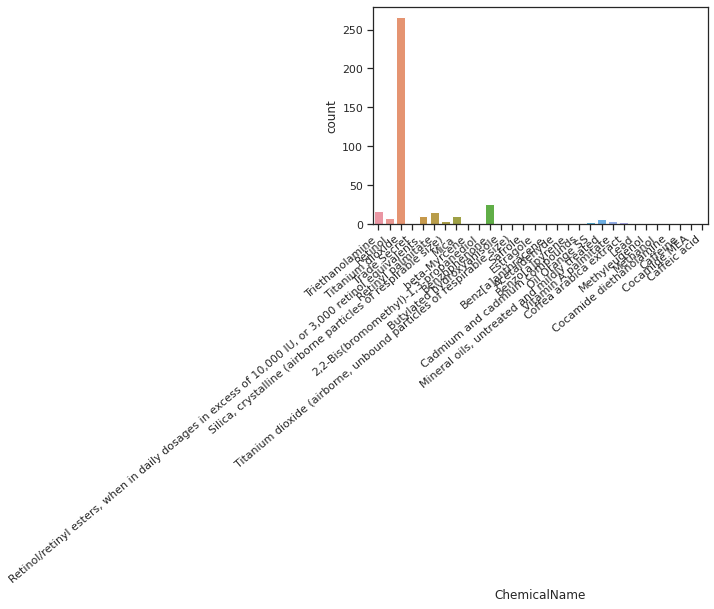

In [ ]:
ax = sns.countplot(x="ChemicalName", data=df_MChem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

# Titanium dioxide:
### (oxidized form of titanium- naturally occurring in mineral form) 
### - Found in: Cosmetics, paint, paper, food, plastics, inks, toothpaste, and other products. 
### - Purpose:  Pigment to increase opacity as well as for product thickening 
## Potential Health Impacts: 
- People may be exposed to titanium dioxide by inhalation or ingestion, depending on the specific product. 
- Studies of rats that inhaled high concentrations of titanium dioxide have found increased rates of respiratory tract cancers. 
- Some scientists believe that consumer exposure to titanium dioxide is low because of the low potential for inhalation of products that are not in powdered form. 
- California Proposition 65 categorizes titanium dioxide as a carcinogen when it is in a form that can be breathed in. 
- The International Agency for Research on Cancer (IARC) lists titanium dioxide in all its forms as an animal carcinogen and a possible human carcinogen.
Source: https://data.chhs.ca.gov/dataset/chemicals-in-cosmetics/resource/3fdc8616-b31e-4a0a-bf04-43ccde2cab9f

In [ ]:
# remove titianium Dioxide to see better seperation of other chemicals
df_MChem = df_MChem[~df_MChem["ChemicalName"].str.contains("Titanium dioxide", na=False)]

#### Titainium Dioxide was removed for the data set to allow for ease in vizualizing the differences between the other chemicals present in Facial mosturizing products. 

# The Most Common Potentially Harmful ingredients in Facial Mosturizers
##### * Excluding Titanium Dioxide

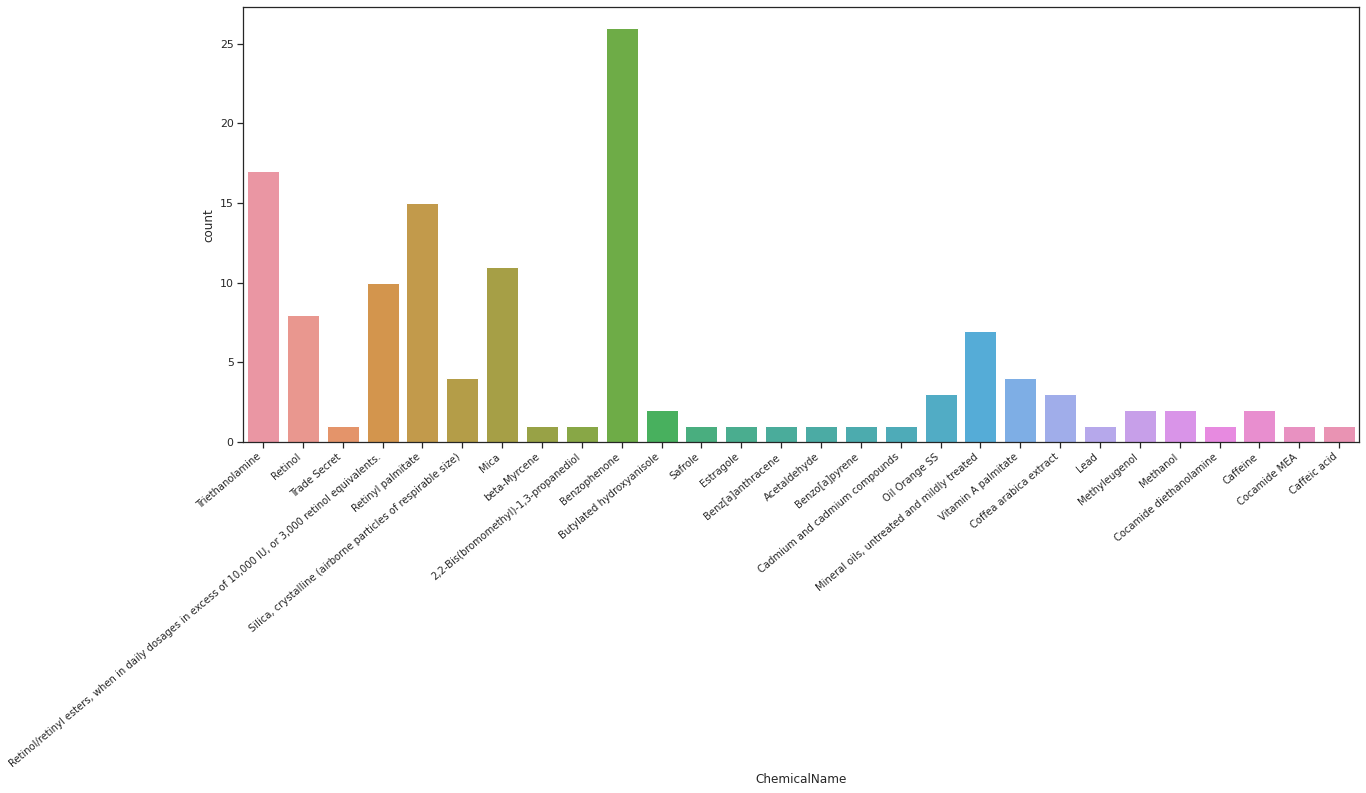

In [ ]:
ax = sns.countplot(x="ChemicalName", data=df_MChem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

### There are 37 Products out of the 288 in the Mosturizer Category that contain Titainium Dioxide(the most commonly present harmful ingredient in facial mosturizers as recognized by the California department of health) ranging from the 3.7- 4.8 rating the top rated mositurizers do not contiain this chemical ingredient


In [ ]:
df_M[df_M['Ingredients'].str.contains("Titanium Dioxide")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
48,Moisturizer,TARTE,Radiance Drops - Rainforest of the Sea™ Collec...,32,3.7,"Neopentyl Glycol Diheptanoate, Isododecane, Jo...",0,0,0,0,0
227,Moisturizer,SHISEIDO,Bio-Performance LiftDynamic Cream,115,3.7,"Water, Glycerin, Tricaprylin, Butylene Glycol,...",1,1,1,1,1
169,Moisturizer,CLINIQUE,Moisture Surge CC Cream Hydrating Colour Corre...,39,3.8,"Water, Squalane, Octyldodecyl Neopentanoate, B...",0,0,0,0,0
191,Moisturizer,CAUDALIE,Resveratrol Lift Face Lifting Soft Cream,76,3.9,"Water, Coco-Caprylate/Caprate*, Caprylic/Capri...",1,1,1,0,1
127,Moisturizer,BOBBI BROWN,BB Cream SPF 35,47,3.9,"-Octinoxate 7.50%, Octisalate 4.00%, Oxybenzon...",1,0,1,1,0
71,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+Illumination™ Cream w...,38,3.9,"Water, Snail Secretion Filtrate, Titanium Diox...",1,1,1,1,1
35,Moisturizer,IT COSMETICS,Your Skin But Better CC+ Cream Oil-Free Matte ...,38,3.9,"Water, Dimethicone, Butylene Glycol Dicaprylat...",1,1,1,1,0
263,Moisturizer,SHISEIDO,Ibuki Protective Moisturizer Broad Spectrum SP...,45,3.9,"Water, Sd Alcohol 40-B,Glycerin,Dipropylene Gl...",0,0,0,0,0
183,Moisturizer,SMASHBOX,Camera Ready CC Cream Broad Spectrum SPF 30 Da...,42,3.9,"Octinoxate 7.50%, Octisalate 4.00%, Oxybenzone...",1,1,1,1,1
36,Moisturizer,FARSÁLI,Unicorn Essence Antioxidant Primer Serum,54,3.9,"Water, Propanediol, Glycerin, Polysorbate 20, ...",0,0,0,0,0


# Benzophenone:
### (Synthetic compound that blocks ultraviolet (UV) light)
### - Found in: Sunscreens and other cosmetics. 
### - Purpose:  Protects other ingredients in product formulations from UV damage and prevents product degradation
## Potential Health Impacts: 
- Benzophenone can enter the body by inhalation, through skin absorption, or by ingestion, depending on the specific product. 
- Studies of rats that ingested benzophenone found increased rates of liver and kidney cancer. 
- The International Agency for Research on Cancer (IARC) categorizes benzophenone as an animal carcinogen and a possible human carcinogen. 
- Benzophenone and its metabolites mimic estrogen activity in mice. 
- Researchers have found that derivatives of benzophenone, including benzophenone-2 and benzophenone-3 (oxybenzone), are endocrine disruptors with the potential to interrupt the body's normal hormone function.
Source: https://data.chhs.ca.gov/dataset/chemicals-in-cosmetics/resource/3fdc8616-b31e-4a0a-bf04-43ccde2cab9f

### Only 3 Products in the Mostuirzers catergory contain Benzophenon the 2nd most common harmful ingredient. 
The products are all in the 4.0-< 4.5 rating Range and fall towards

In [ ]:
df_M[df_M['Ingredients'].str.contains("Benzophenon")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
206,Moisturizer,CLINIQUE,Moisture Surge Hydrating Supercharged Concentrate,39,4.0,"Water , Glycerin , Butylene Glycol , Phenyl Tr...",1,1,1,1,1
149,Moisturizer,DR. DENNIS GROSS SKINCARE,Ferulic + Retinol Anti-Aging Moisturizer,75,4.1,"Water, Dimethicone, Cyclopentasiloxane, Isodod...",1,1,1,1,1
80,Moisturizer,GLAMGLOW,THIRSTYMUD™ Hydrating Treatment,59,4.3,"Water, Caprylic/Capric Triglyceride, Glycerin,...",1,1,1,1,0


# Triethanolamine
### (synthetic compound similar in structure to diethanoloamine)
### - Found in: Cosmetics 
### - Purpose:  To help the ingredients mix together and flow well
## Potential Health Impacts: 
- People may be exposed to triethanolamine by skin contact or ingestion. 
- Triethanolamine may be a skin irritant, particularly for individuals previously sensitized. 
- Triethanoloamine is not considered a carcinogen. 
- However, triethanolamine may be contaminated with trace amounts of diethanolamine, which the International Agency for Research on Cancer (IARC) considers a possible human carcinogen.
Source: https://data.chhs.ca.gov/dataset/chemicals-in-cosmetics/resource/3fdc8616-b31e-4a0a-bf04-43ccde2cab9f

### 13 mosturizer products contain triethanolamine

In [ ]:
df_M[df_M['Ingredients'].str.contains("Triethanolamine")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
222,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Moisturizer,29,3.9,"Water Squalane, Glycerin, Peg-100 Stearate, Gl...",1,1,1,1,1
29,Moisturizer,CLINIQUE,Dramatically Different Moisturizing Lotion+,28,3.9,"Water , Mineral Oil/Paraffinum Liquidum/Huile ...",1,1,0,0,0
263,Moisturizer,SHISEIDO,Ibuki Protective Moisturizer Broad Spectrum SP...,45,3.9,"Water, Sd Alcohol 40-B,Glycerin,Dipropylene Gl...",0,0,0,0,0
237,Moisturizer,AMOREPACIFIC,MOISTURE BOUND Refreshing Hydra-Gel Oil-Free,100,4.2,"Phyllostachis Bambusoides Juice, Butylene Glyc...",1,1,1,0,1
186,Moisturizer,KATE SOMERVILLE,Oil Free Moisturizer,65,4.2,"Water, Isocetyl Stearate, Pentaerythrityl Tetr...",1,0,1,1,0
256,Moisturizer,KATE SOMERVILLE,RetAsphere™ 2-in-1 Retinol Night Cream,85,4.3,"Water, Ethylhexyl Palmitate, Diethylhexyl Carb...",1,1,1,1,0
210,Moisturizer,LANCÔME,BIENFAIT MULTI-VITAL - SPF 30 CREAM - High Pot...,49,4.3,"Water, Dimethicone, Glycerin, Alcohol Denat., ...",0,0,0,0,0
79,Moisturizer,AMOREPACIFIC,FUTURE RESPONSE Age Defense Creme,195,4.4,"Camellia Sinensis Leaf Water, Butylene Glycol,...",1,1,1,1,1
208,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Overnight Hydrating Mask,35,4.4,"Water Glycerin, Propylene Glycol, Squalane, Sh...",1,1,1,1,1
9,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1


# The Most common Potentialy Harmful Ingredients in Skin Cleansers

In [ ]:
# create a small data frame of skin cleansers from the chemicals data base
df_CChem= df_Chem[df_Chem["SubCategory"].str.contains("Skin Cleansers", na=False)]
df_CChem.head()

,ProductName,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,ChemicalId,ChemicalName,ChemicalCount
16,Warm Body Scrub,"Sunrider Manufacturing, L.P.",Kandesn Spa,90,Skin Care Products,93,Skin Cleansers,1241,"Silica, crystalline (airborne particles of res...",0
20,MANGO HAND WASH,"Buth-na-bodhaige, Inc",The Body Shop,90,Skin Care Products,93,Skin Cleansers,26604,Cocamide DEA,0
55,St. Ives Body Polish With Collagen Elastin,"Alberto Culver USA, Inc.",St. Ives,90,Skin Care Products,93,Skin Cleansers,0,Trade Secret,0
63,Seaweed Deep Cleansing Facial Wash,"Buth-na-bodhaige, Inc",The Body Shop,90,Skin Care Products,93,Skin Cleansers,4422,Cocamide diethanolamine,0
64,Elizabeth Arden 2-in-1 Cleanser All Skin Types,"Elizabeth Arden, Inc.",Elizabeth Arden,90,Skin Care Products,93,Skin Cleansers,6928,Methyleugenol,0


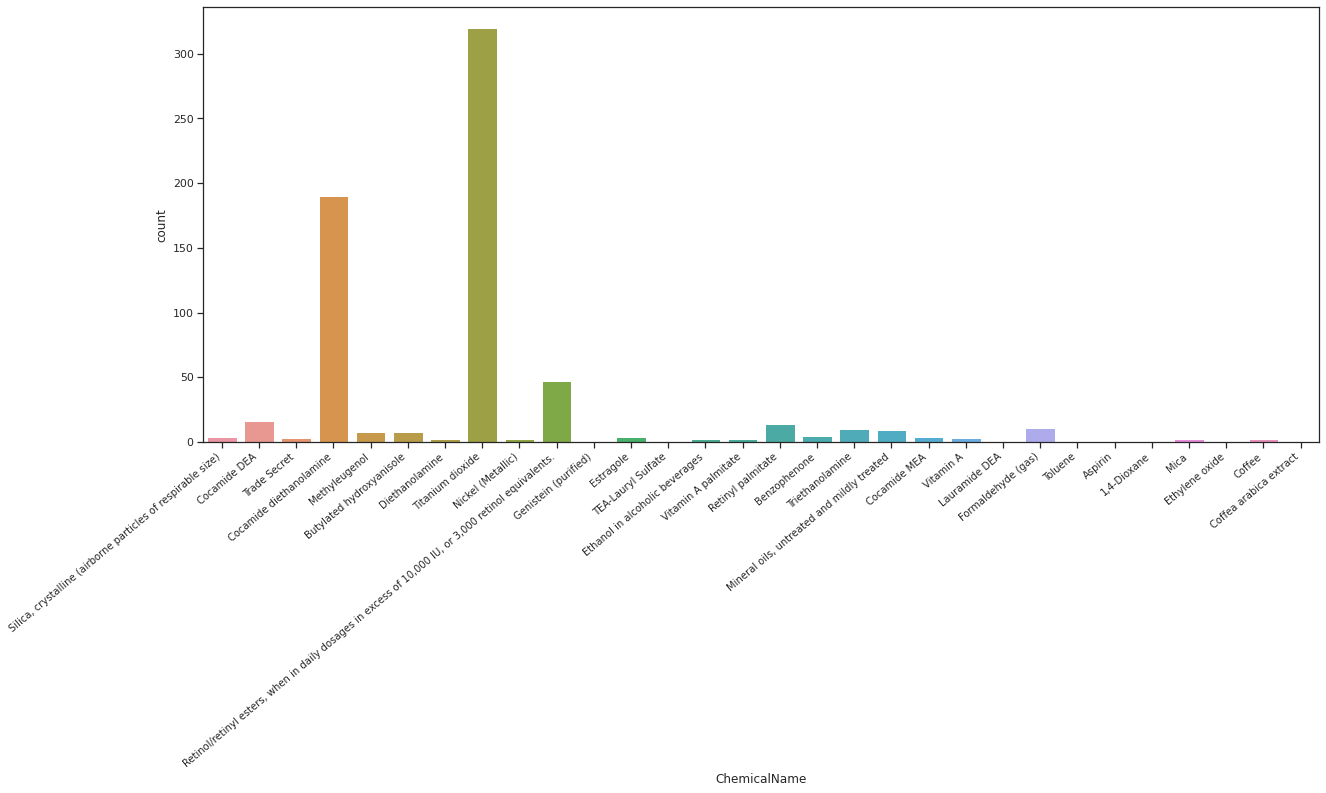

In [ ]:
ax = sns.countplot(x="ChemicalName", data=df_CChem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

In [ ]:
df_CChem = df_CChem[~df_CChem["ChemicalName"].str.contains("Titanium dioxide", na=False)]

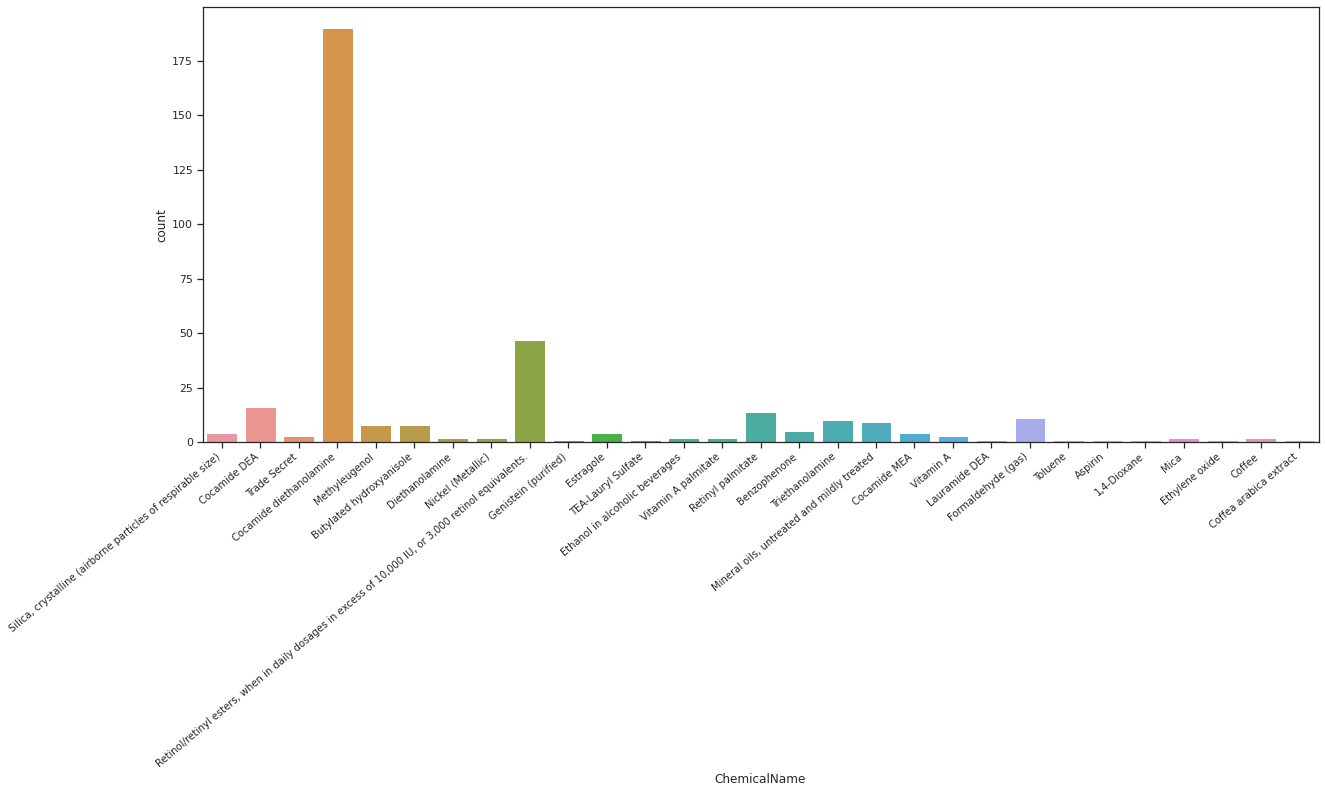

In [ ]:
ax = sns.countplot(x="ChemicalName", data=df_CChem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

### There are 22 Skin Cleansers from the Cosmetics data set that contain Titanium Dioxide

In [ ]:
df_c[df_c['Ingredients'].str.contains("Titanium Dioxide")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
410,Cleanser,GLAMGLOW,SUPERCLEANSE™ Clearing Cream-to-Foam Cleanser,32,3.9,"Water, Sodium C14-16 Olefin Sulfonate, Magnesi...",1,0,1,1,0
543,Cleanser,GLAMGLOW,POWERMUD™ Dualcleanse Treatment,59,3.9,"Water, Bentonite, Glycerin, Hamamelis Virginia...",1,1,1,1,0
384,Cleanser,GLAMGLOW,FLASHMUD™ Brightening Treatment,59,4.1,"Water, Silica, Kaolin, Cetyl Alcohol, C12-15 A...",1,1,1,1,0
482,Cleanser,CLINIQUE,Blackhead Solutions 7 Day Deep Pore Cleanse & ...,24,4.2,"Water, Kaolin, Glycerin, Butylene Glycol, Magn...",1,1,1,1,1
503,Cleanser,LA MER,The Cleansing Oil,95,4.3,"Caprylic/Capric Triglyceride, Polysorbate 85, ...",1,1,1,1,1
358,Cleanser,KATE SOMERVILLE,EradiKate® Daily Cleanser Acne Treatment,38,4.3,"Water, Sodium Cocoyl Isethionate, Coco-Glucosi...",1,0,1,1,0
498,Cleanser,KORRES,Wild Rose Exfoliating Cleanser,28,4.4,"Water, Aloe Barbadensis Leaf Juice, Sodium Coc...",1,1,1,1,1
492,Cleanser,PETER THOMAS ROTH,Un-Wrinkle Turbo™ Line Smoothing Toning Lotion,38,4.4,"Water, Glycerin, Palmitoyl Oligopeptide, Palmi...",0,0,0,0,0
558,Cleanser,DR. JART+,Dermaclear™ Trans-Foam Clay Trio,35,4.4,"Water, Titanium Dioxide, Montmorillonite, Sodi...",0,0,0,0,0
576,Cleanser,CLINIQUE,Facial Soap with Dish,15,4.4,"Sodium Palmate/Cocoate Or/Ou Palm Kernelate , ...",0,0,0,0,0


### There are 11 Skin Cleansers that contain Triethanolamine

In [ ]:
#cocamide diethanolamine is known as triethanol amine in product formulations 
df_c[df_c['Ingredients'].str.contains("Triethanolamine")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
460,Cleanser,SUNDAY RILEY,Martian Mattifying Melting Water-Gel Toner,55,3.9,"Water, Alcohol Denat., Dicaprylyl Carbonate, D...",1,0,1,1,1
492,Cleanser,PETER THOMAS ROTH,Un-Wrinkle Turbo™ Line Smoothing Toning Lotion,38,4.4,"Water, Glycerin, Palmitoyl Oligopeptide, Palmi...",0,0,0,0,0
303,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1
344,Cleanser,KIEHL'S SINCE 1851,Ultra Facial Toner,16,4.5,"Water, Glycerin, Squalane, Phenoxyethanol, Acr...",1,1,1,1,1
462,Cleanser,SATURDAY SKIN,Rub-A-Dub Refining Peel Gel,28,4.6,"Water, Glycerin, Cellulose, Butylene Glycol, A...",1,1,1,1,1
342,Cleanser,KIEHL'S SINCE 1851,Ultra Facial Cleanser,20,4.6,"Water, Sodium Laureth Sulfate, Decyl Glucoside...",1,1,1,1,1
304,Cleanser,LANCÔME,Tonique Confort Re-Hydrating Comforting Toner ...,26,4.6,"Water, Butylene Glycol, Glycerin, Cyclopentasi...",0,0,0,0,0
430,Cleanser,CLINIQUE,7 Day Scrub Cream Rinse-Off Formula,22,4.6,"Water , Tridecyl Stearate , Tridecyl Trimellit...",0,0,0,0,0
382,Cleanser,LAURA MERCIER,Flawless Skin Face Polish,32,4.7,"Aqua (Water), Polyethylene, Butylene Glycol, G...",0,0,0,0,0
496,Cleanser,PHILOSOPHY,A Glowing Regimen Trial Set,34,4.8,"Purity Made Simple Cleanser: Water, Sodium Lau...",1,1,1,1,1


### There are 3 products that contain Retinol

In [ ]:
df_c[df_c['Ingredients'].str.contains("Retinol")]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
464,Cleanser,PHILOSOPHY,Ultimate Miracle Worker Multi-Rejuvenating Ret...,75,4.1,"Cyclopentasiloxane, Dimethicone, Tetrahexyldec...",1,1,1,1,1
523,Cleanser,DR. DENNIS GROSS SKINCARE,One Step Acne Eliminating Pads,42,4.2,"Achillea Millefolium Extract, Alcohol Denat., ...",0,0,0,0,0
385,Cleanser,MURAD,Time Release Acne Cleanser,38,4.4,"Water, Disodium Cocoamphodiacetate, Glycerin, ...",1,1,1,1,1


### There seems to be a variation in the ranking and price in the products that contain potentially harmful chemicals the data does not support the hypothesis that the higher priced/ranked products will have less harmful chemicals in them. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df42a4e9-a3ea-4ea5-bda2-bcff83f2a6bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>